In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import ast
import warnings
from matplotlib.ticker import MaxNLocator
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

FIG_SIZE_MEDIUM = (12, 8)
FIG_SIZE_LARGE = (16, 10)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Годовой проект /habr.csv", encoding='utf-8')

print(f"Размер датасета: {data.shape}")
data.head()

Размер датасета: (151904, 9)


,id,text,keywords,hubs,username,reading_time,title,time,status
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"['даджет', 'даджеты', 'kickstarter', 'bluetoot...","['Блог компании Даджет', 'Гаджеты']",RubyFOX,6.0,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56,ok
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"['Porsche', 'Mission E']","['Энергия и элементы питания', 'Транспорт', 'Э...",SLY_G,1.0,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20,ok
2,390013,Медики из Бостонского детского госпиталясмогли...,"['данио-рерио', 'рак', 'раковая опухоль', 'пол...",['Научно-популярное'],SLY_G,2.0,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21,ok
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"['википедия', 'нетривиальные бизнесы', 'свобод...","['Научно-популярное', 'Краудсорсинг', 'Социаль...",ssneg,2.0,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09,ok
4,390019,Генетики из исследовательской компании 23andMe...,"['совы', 'жаворонки', 'распорядок дня', 'цирка...","['Научно-популярное', 'Здоровье']",SLY_G,2.0,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36,ok


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151904 entries, 0 to 151903
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            151904 non-null  int64  
 1   text          151554 non-null  object 
 2   keywords      151904 non-null  object 
 3   hubs          151904 non-null  object 
 4   username      151471 non-null  object 
 5   reading_time  151900 non-null  float64
 6   title         151904 non-null  object 
 7   time          151904 non-null  object 
 8   status        151904 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


In [ ]:
data.isnull().sum()

,0
id,0
text,350
keywords,0
hubs,0
username,433
reading_time,4
title,0
time,0
status,0


In [ ]:
data.dropna(subset=['text'], inplace=True)
data['username'].fillna(data['username'].mode()[0], inplace=True)
data['reading_time'].fillna(data['reading_time'].median(), inplace=True)

In [ ]:
print("\nПропуски после обработки:")
data.isnull().sum()


Пропуски после обработки:


,0
id,0
text,0
keywords,0
hubs,0
username,0
reading_time,0
title,0
time,0
status,0


In [ ]:
data.describe(include='all')

,id,text,keywords,hubs,username,reading_time,title,time,status
count,151554.000000,151554,151554,151554,151554,151554.000000,151554,151554,151554
unique,NaN,151532,141798,76629,24906,NaN,151179,151243,1
top,NaN,Deleted,['черт знает что'],['Информационная безопасность'],denis-19,NaN,ТОП-3 ИБ-событий недели по версии Jet CSIRT / ...,2019-10-02 07:00:02,ok
freq,NaN,4,155,748,7793,NaN,113,4,151554
mean,586198.392817,NaN,NaN,NaN,NaN,5.940378,NaN,NaN,NaN
std,121346.726739,NaN,NaN,NaN,NaN,5.699184,NaN,NaN,NaN
min,390007.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,479452.500000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,569435.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,700295.500000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


***УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В КАТЕГОРИАЛЬНЫХ СТОЛБЦАХ***

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {data[col].nunique()} уникальных значений")
    if data[col].nunique() < 20:
        print(data[col].value_counts())


text: 151532 уникальных значений

keywords: 141798 уникальных значений

hubs: 76629 уникальных значений

username: 24906 уникальных значений

title: 151179 уникальных значений

time: 151243 уникальных значений

status: 1 уникальных значений
status
ok    151554
Name: count, dtype: int64


In [ ]:
data['status'].value_counts()
print(f"Уникальных значений: {data['status'].nunique()}")

Уникальных значений: 1


In [ ]:
# Дропаем их по ненадобности и неинформативности
data.drop(columns=['id', 'status'], inplace=True, errors='ignore')

In [ ]:
data['time'] = pd.to_datetime(data['time'], errors='coerce')

In [ ]:
duplicates = data.duplicated().sum()
print(f"Найдено дубликатов: {duplicates}")

Найдено дубликатов: 0


In [ ]:
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except:
        return []

data['hubs'] = data['hubs'].apply(safe_literal_eval)
data['keywords'] = data['keywords'].apply(safe_literal_eval)

data['hubs'] = data['hubs'].apply(lambda lst: [x.lower() for x in lst])
data['keywords'] = data['keywords'].apply(lambda lst: [x.lower() for x in lst])


Всего уникальных хабов: 1406
  it-компании: 18245
  научно-популярное: 13672
  информационная безопасность: 12649
  программирование: 11747
  финансы в it: 7404
  карьера в it-индустрии: 7284
  искусственный интеллект: 6794
  it-инфраструктура: 6541
  законодательство в it: 6366
  машинное обучение: 6251
  гаджеты: 5596
  python: 5188
  веб-разработка: 5159
  игры и игровые консоли: 5096
  социальные сети: 4855


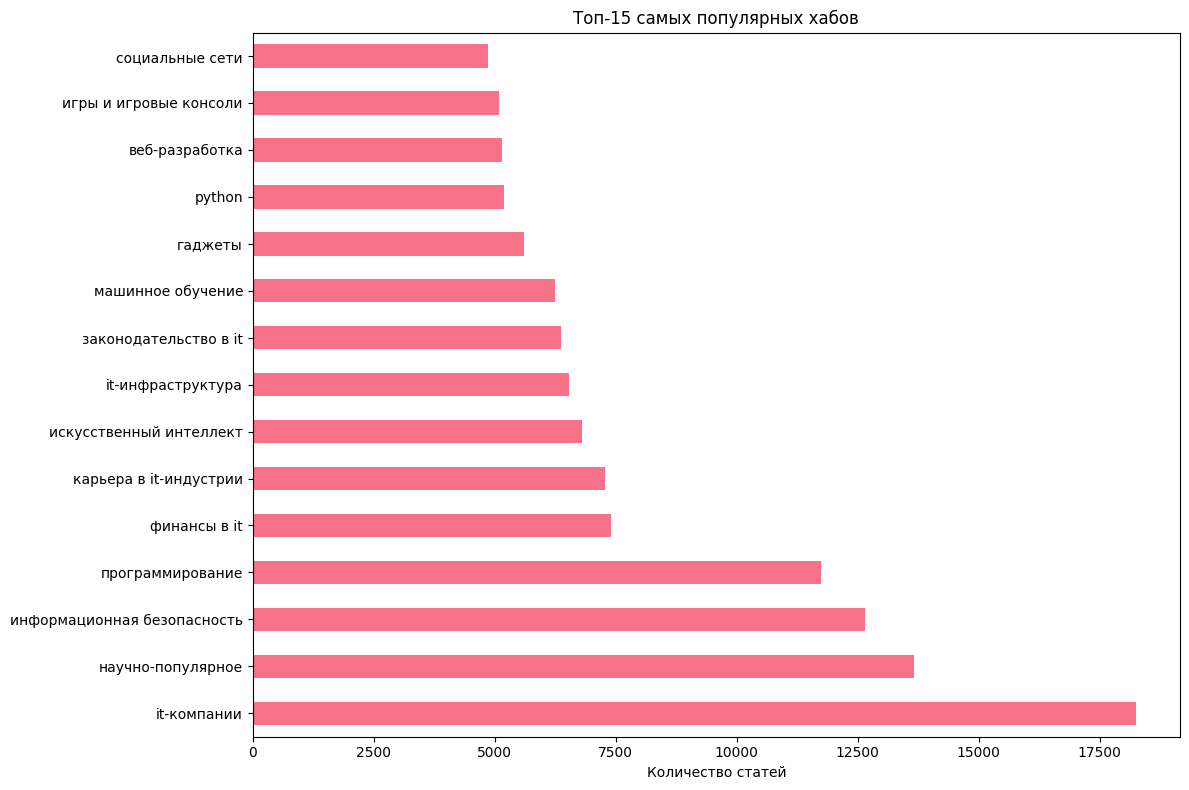

In [ ]:
all_hubs = []
for hubs in data['hubs']:
    all_hubs.extend(hubs)

hub_counts = Counter(all_hubs)
print(f"Всего уникальных хабов: {len(hub_counts)}")

for hub, count in hub_counts.most_common(15):
    print(f"  {hub}: {count}")

plt.figure(figsize=FIG_SIZE_MEDIUM)
pd.Series(dict(hub_counts.most_common(15))).plot(kind='barh')
plt.title('Топ-15 самых популярных хабов')
plt.xlabel('Количество статей')
plt.tight_layout()
plt.show()


count    151554.000000
mean          3.128627
std           1.281839
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: num_hubs, dtype: float64


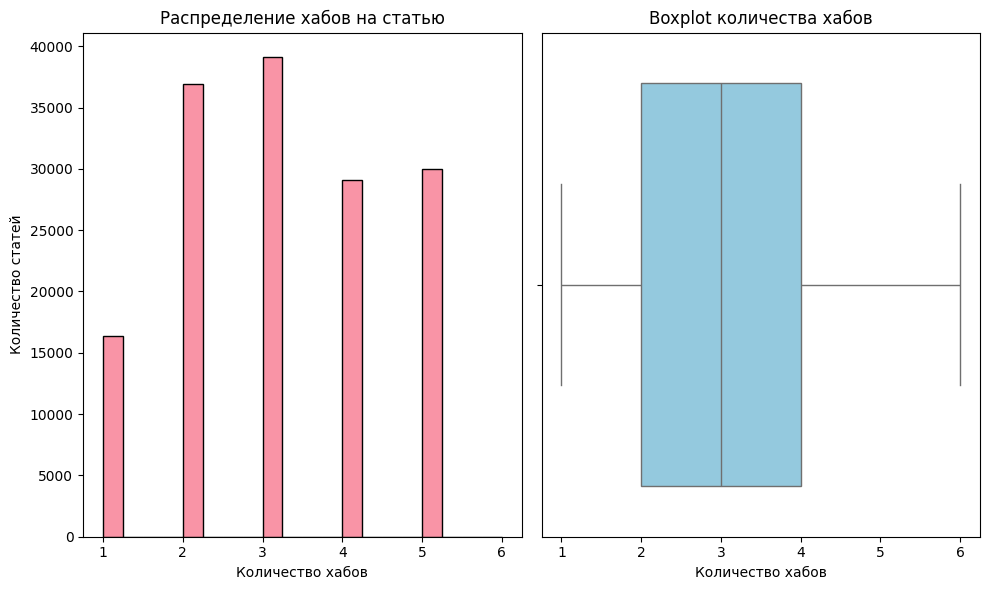

In [ ]:
data['num_hubs'] = data['hubs'].apply(len)
print(data['num_hubs'].describe())

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['num_hubs'], bins=20, kde=False)
plt.title('Распределение хабов на статью')
plt.xlabel('Количество хабов')
plt.ylabel('Количество статей')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['num_hubs'], color='skyblue')
plt.title('Boxplot количества хабов')
plt.xlabel('Количество хабов')

plt.tight_layout()
plt.show()


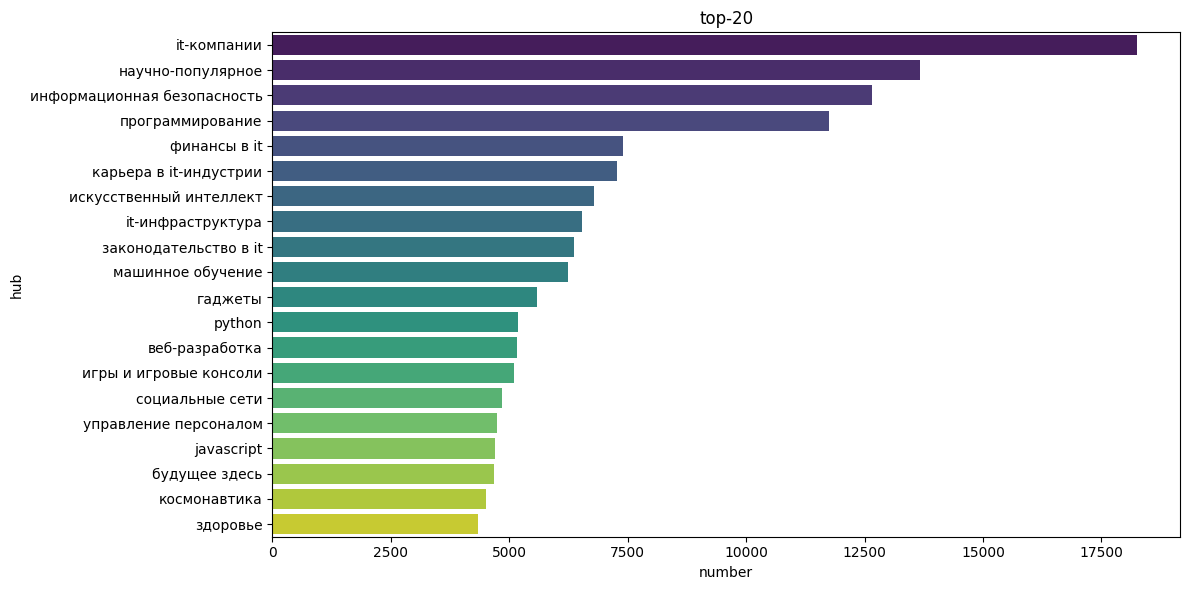

In [ ]:
all_hubs = [hub.lower() for sublist in data['hubs'] for hub in sublist]
hubs_counts = Counter(all_hubs)
hubs_counts_df_popular = pd.DataFrame(hubs_counts.items(), columns=['tag', 'count']).sort_values('count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(y='tag', x='count', data=hubs_counts_df_popular.head(20), palette='viridis')
plt.title("top-20")
plt.xlabel("number")
plt.ylabel("hub")
plt.tight_layout()
plt.show()

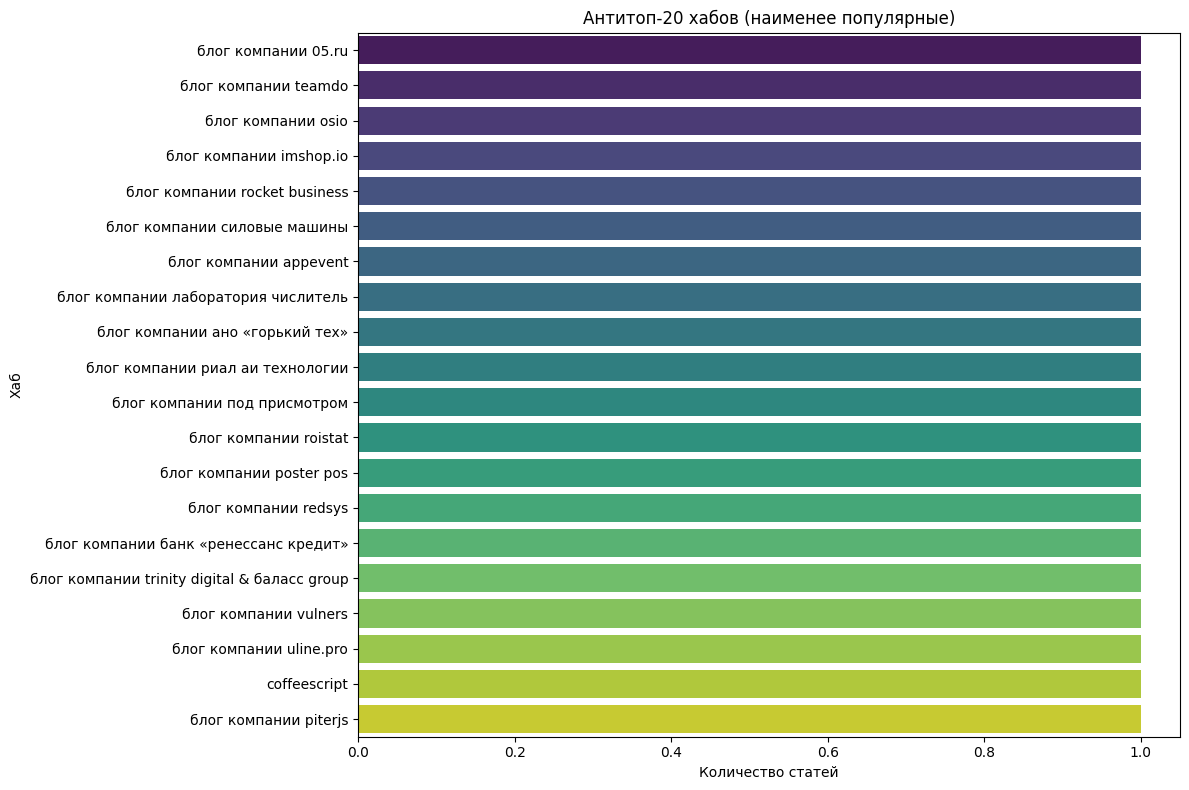

In [ ]:
hub_counts_df = pd.DataFrame(hub_counts.items(), columns=['hub', 'count']).sort_values('count', ascending=True)

plt.figure(figsize=FIG_SIZE_MEDIUM)
sns.barplot(y='hub', x='count', data=hub_counts_df.head(20), palette='viridis')
plt.title("Антитоп-20 хабов (наименее популярные)")
plt.xlabel("Количество статей")
plt.ylabel("Хаб")
plt.tight_layout()
plt.show()

count    151554.000000
mean          5.456774
std           3.098345
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          93.000000
Name: num_keywords, dtype: float64


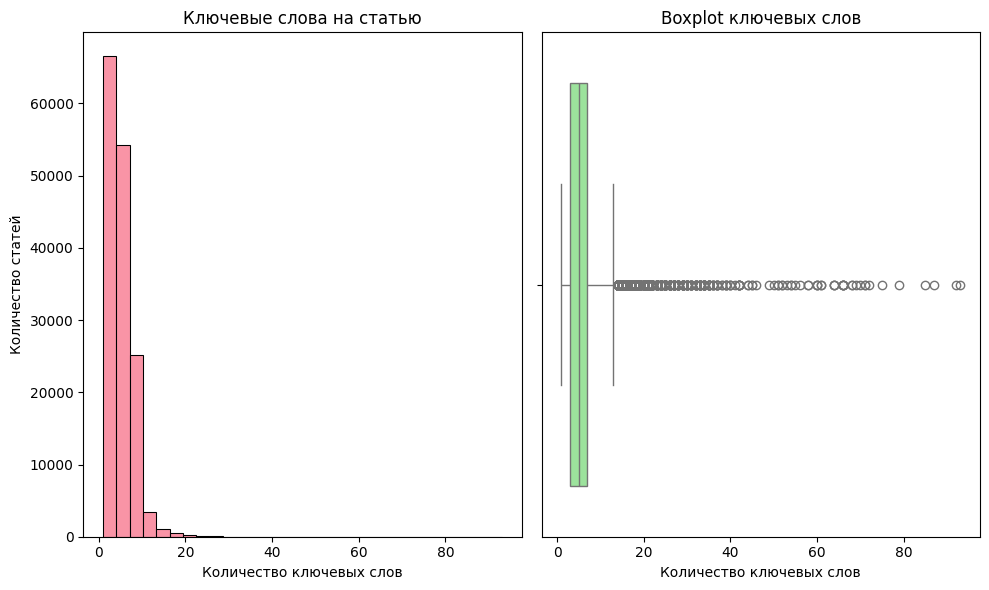

In [ ]:
data['num_keywords'] = data['keywords'].apply(len)
print(data['num_keywords'].describe())

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['num_keywords'], bins=30, kde=False)
plt.title('Ключевые слова на статью')
plt.xlabel('Количество ключевых слов')
plt.ylabel('Количество статей')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['num_keywords'], color='lightgreen')
plt.title('Boxplot ключевых слов')
plt.xlabel('Количество ключевых слов')

plt.tight_layout()
plt.show()

year
2016     4620
2017     3899
2018    10580
2019    19959
2020    22381
2021    26871
2022    29016
2023    31820
2024     2387
2025       21
Name: count, dtype: int64


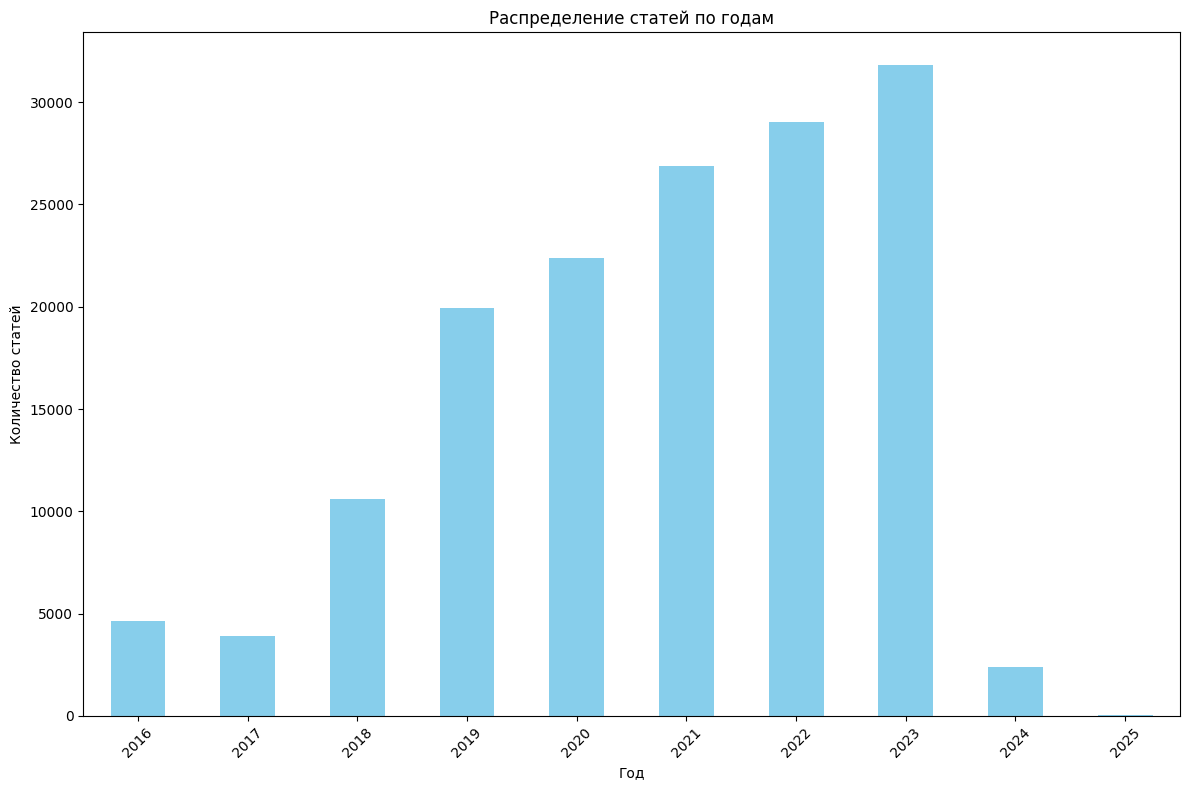

In [ ]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['hour'] = data['time'].dt.hour
data['year_month'] = data['time'].dt.to_period('M')

yearly_posts = data['year'].value_counts().sort_index()
print(yearly_posts)

plt.figure(figsize=FIG_SIZE_MEDIUM)
yearly_posts.plot(kind='bar', color='skyblue')
plt.title('Распределение статей по годам')
plt.xlabel('Год')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


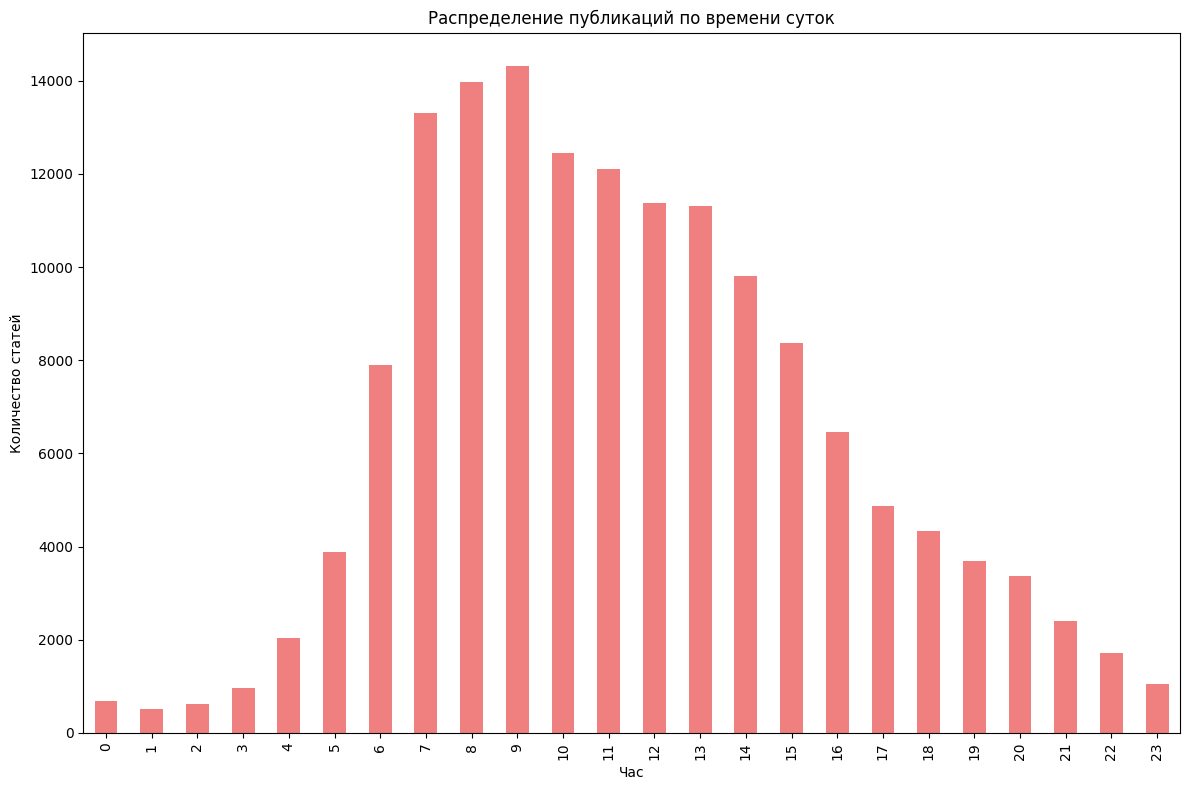

In [ ]:
hourly_posts = data['hour'].value_counts().sort_index()

plt.figure(figsize=FIG_SIZE_MEDIUM)
hourly_posts.plot(kind='bar', color='lightcoral')
plt.title('Распределение публикаций по времени суток')
plt.xlabel('Час')
plt.ylabel('Количество статей')
plt.tight_layout()
plt.show()

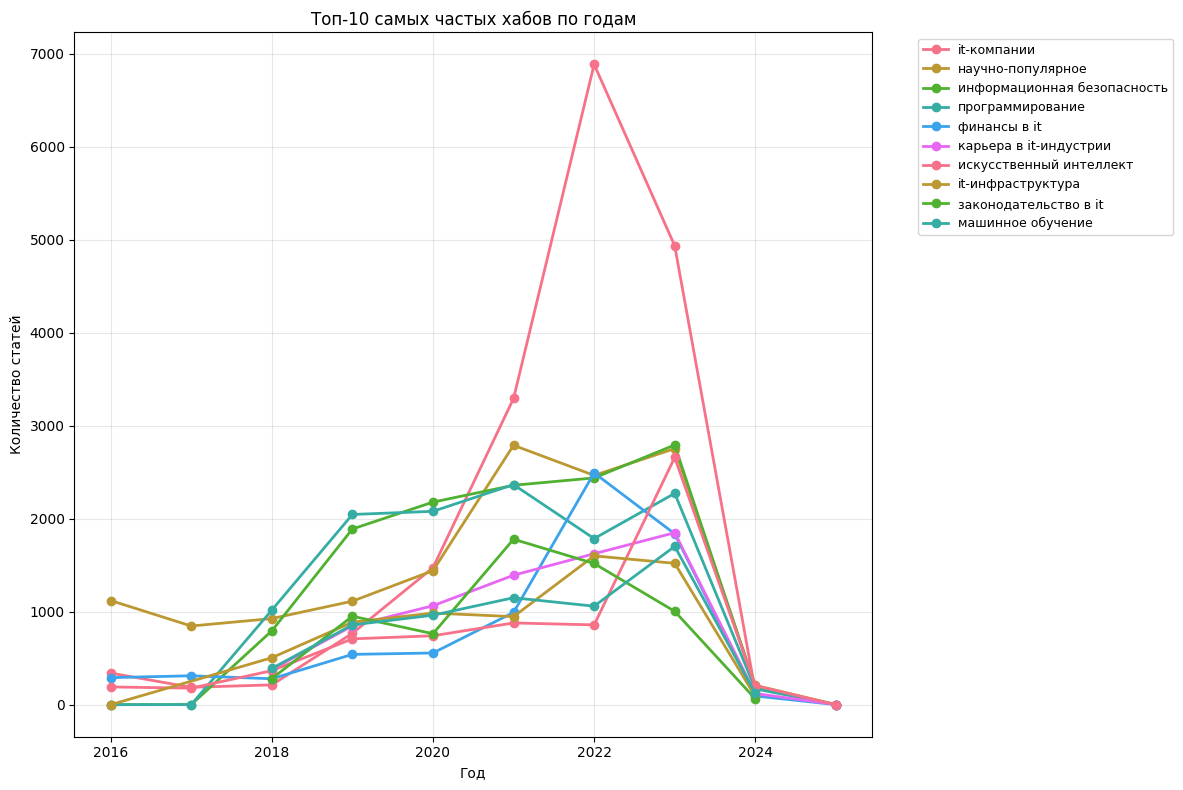

In [ ]:

data_exploded = data.explode("hubs").copy()
tag_trend_year = (
    data_exploded
    .groupby(["year", "hubs"])
    .size()
    .reset_index(name="count")
)

top_tags = (
    tag_trend_year.groupby("hubs")["count"]
    .sum()
    .nlargest(10)
    .index
)

tag_trend_top = tag_trend_year[tag_trend_year["hubs"].isin(top_tags)]

plt.figure(figsize=FIG_SIZE_MEDIUM)
for tag in top_tags:
    subset = tag_trend_top[tag_trend_top["hubs"] == tag]
    plt.plot(subset["year"], subset["count"], label=tag, marker='o', linewidth=2)

plt.title("Топ-10 самых частых хабов по годам")
plt.xlabel("Год")
plt.ylabel("Количество статей")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
data['text_len'] = data['text'].apply(lambda x: len(str(x)))
data['title_len'] = data['title'].apply(lambda x: len(str(x)))

print("длина текста:")
print(data['text_len'].describe())

print()
print("длина заголовков:")
print(data['title_len'].describe())

длина текста:
count    151554.000000
mean       9286.093188
std        9974.856217
min           3.000000
25%        2862.000000
50%        6769.000000
75%       12444.000000
max      770030.000000
Name: text_len, dtype: float64

длина заголовков:
count    151554.000000
mean         69.553671
std          24.252122
min           9.000000
25%          51.000000
50%          68.000000
75%          86.000000
max         275.000000
Name: title_len, dtype: float64


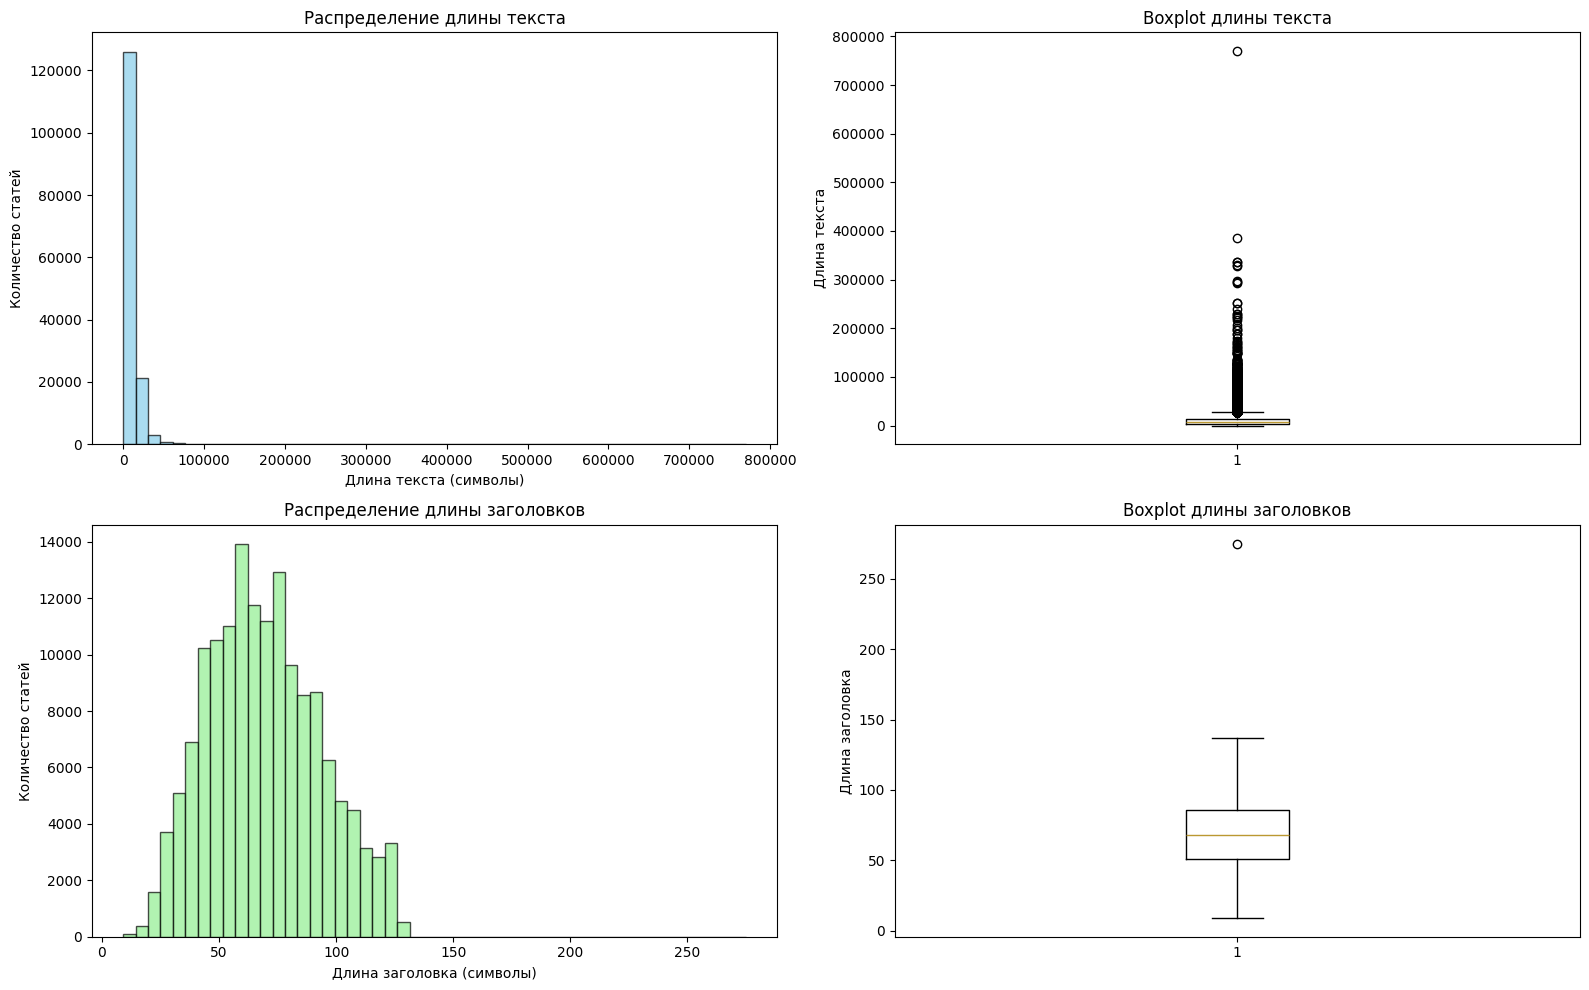

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE_LARGE)

axes[0, 0].hist(data['text_len'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение длины текста')
axes[0, 0].set_xlabel('Длина текста (символы)')
axes[0, 0].set_ylabel('Количество статей')

axes[0, 1].boxplot(data['text_len'])
axes[0, 1].set_title('Boxplot длины текста')
axes[0, 1].set_ylabel('Длина текста')

axes[1, 0].hist(data['title_len'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Распределение длины заголовков')
axes[1, 0].set_xlabel('Длина заголовка (символы)')
axes[1, 0].set_ylabel('Количество статей')

axes[1, 1].boxplot(data['title_len'])
axes[1, 1].set_title('Boxplot длины заголовков')
axes[1, 1].set_ylabel('Длина заголовка')

plt.tight_layout()
plt.show()


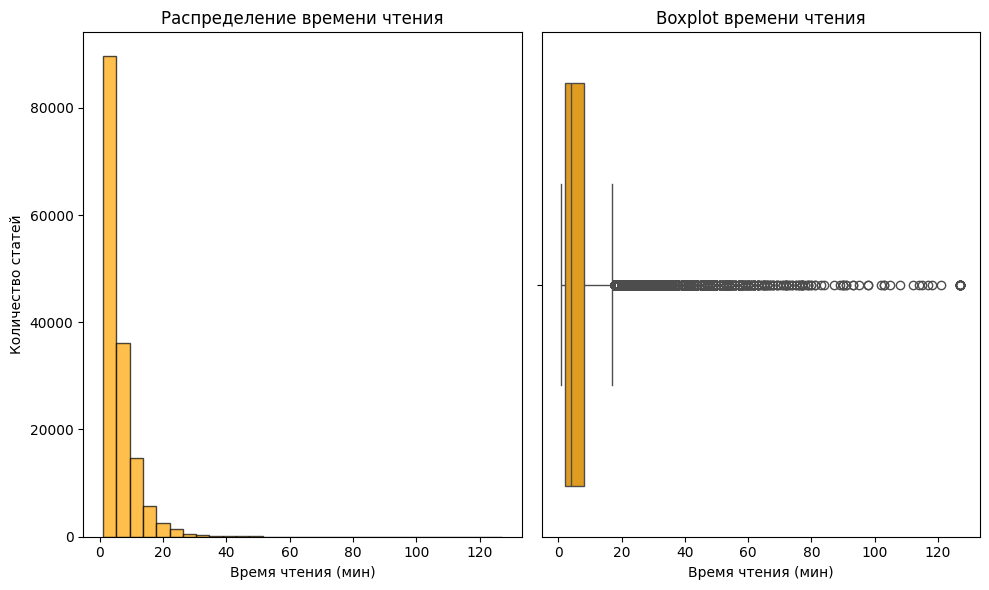

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data['reading_time'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Распределение времени чтения')
plt.xlabel('Время чтения (мин)')
plt.ylabel('Количество статей')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['reading_time'], color='orange')
plt.title('Boxplot времени чтения')
plt.xlabel('Время чтения (мин)')

plt.tight_layout()
plt.show()



Матрица корреляций:
              reading_time  num_hubs  num_keywords      year     month  \
reading_time      1.000000  0.162706      0.089674 -0.038234  0.004758   
num_hubs          0.162706  1.000000      0.273473  0.050895  0.023894   
num_keywords      0.089674  0.273473      1.000000  0.117057  0.010789   
year             -0.038234  0.050895      0.117057  1.000000 -0.085019   
month             0.004758  0.023894      0.010789 -0.085019  1.000000   
hour             -0.036999 -0.102776     -0.050968 -0.037136 -0.006912   
text_len          0.982757  0.157554      0.087163 -0.043955  0.005183   
title_len        -0.129239  0.071917      0.103227  0.111771  0.015002   

                  hour  text_len  title_len  
reading_time -0.036999  0.982757  -0.129239  
num_hubs     -0.102776  0.157554   0.071917  
num_keywords -0.050968  0.087163   0.103227  
year         -0.037136 -0.043955   0.111771  
month        -0.006912  0.005183   0.015002  
hour          1.000000 -0.036338   0

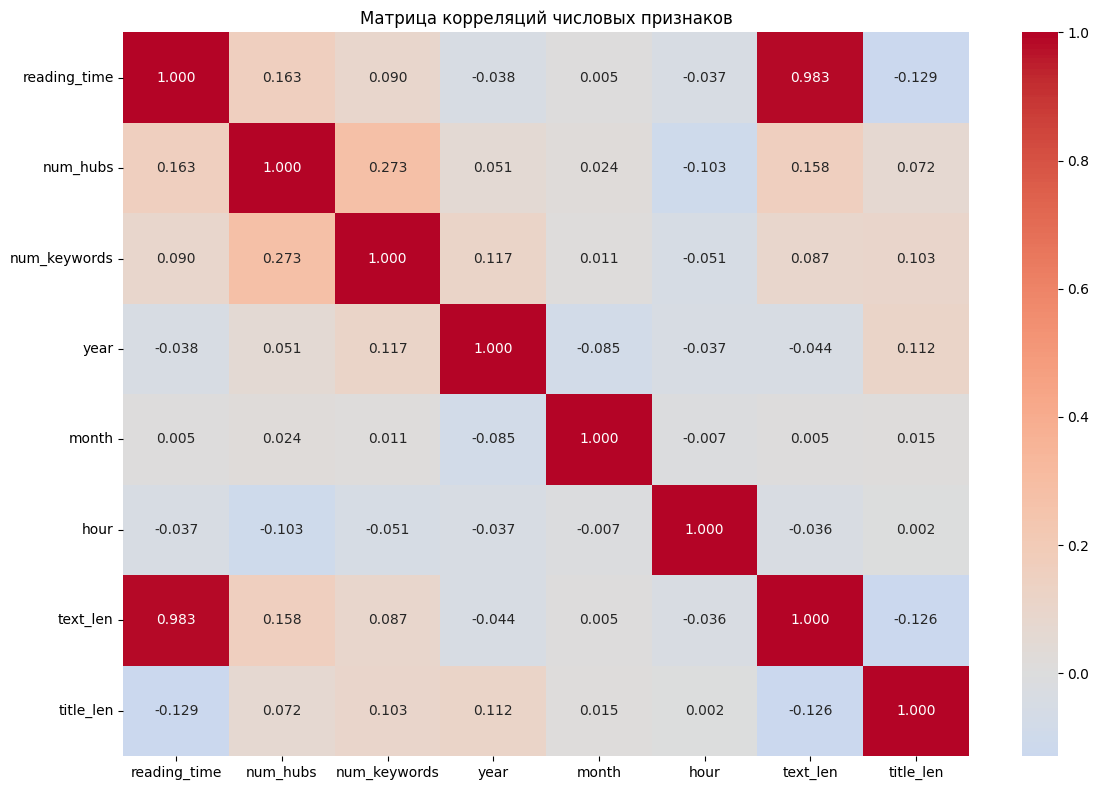

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

correlation_matrix = data[numeric_columns].corr()
print("\nМатрица корреляций:")
print(correlation_matrix)

plt.figure(figsize=FIG_SIZE_MEDIUM)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

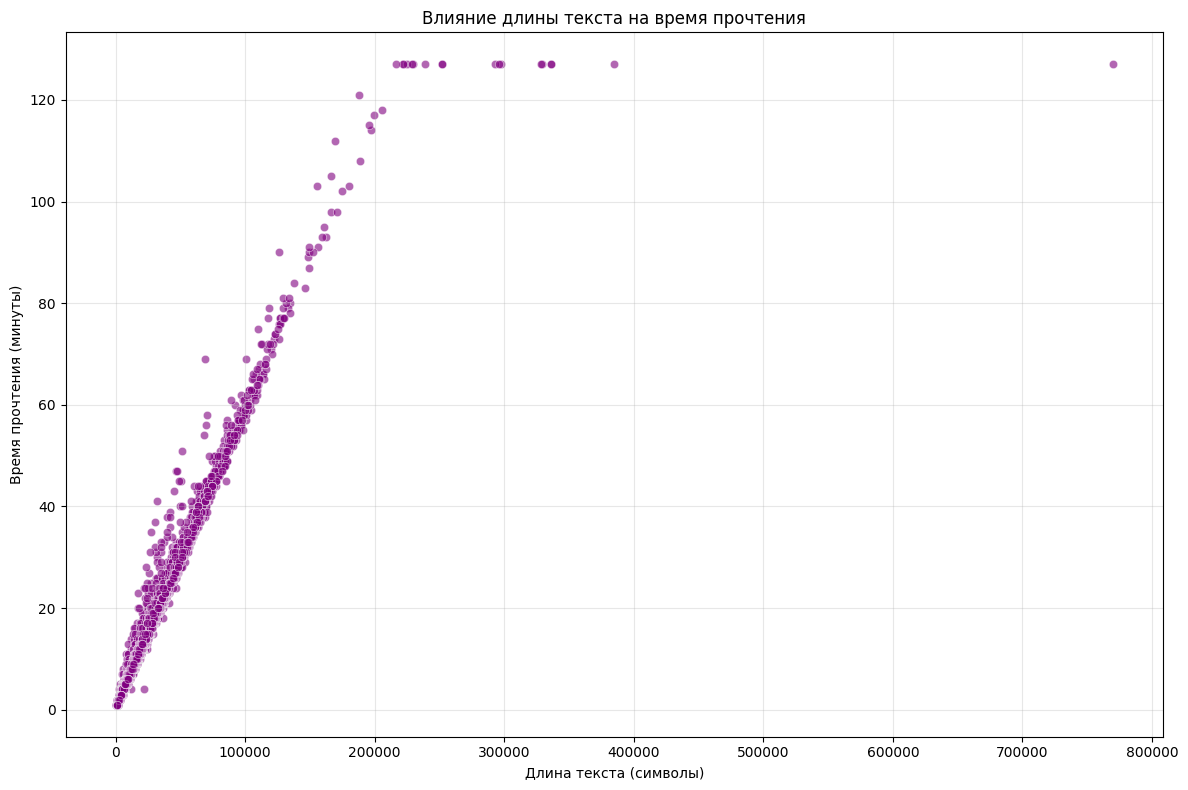

In [ ]:
plt.figure(figsize=FIG_SIZE_MEDIUM)
sns.scatterplot(data=data, x='text_len', y='reading_time', alpha=0.6, color='purple')
plt.title('Влияние длины текста на время прочтения')
plt.xlabel('Длина текста (символы)')
plt.ylabel('Время прочтения (минуты)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

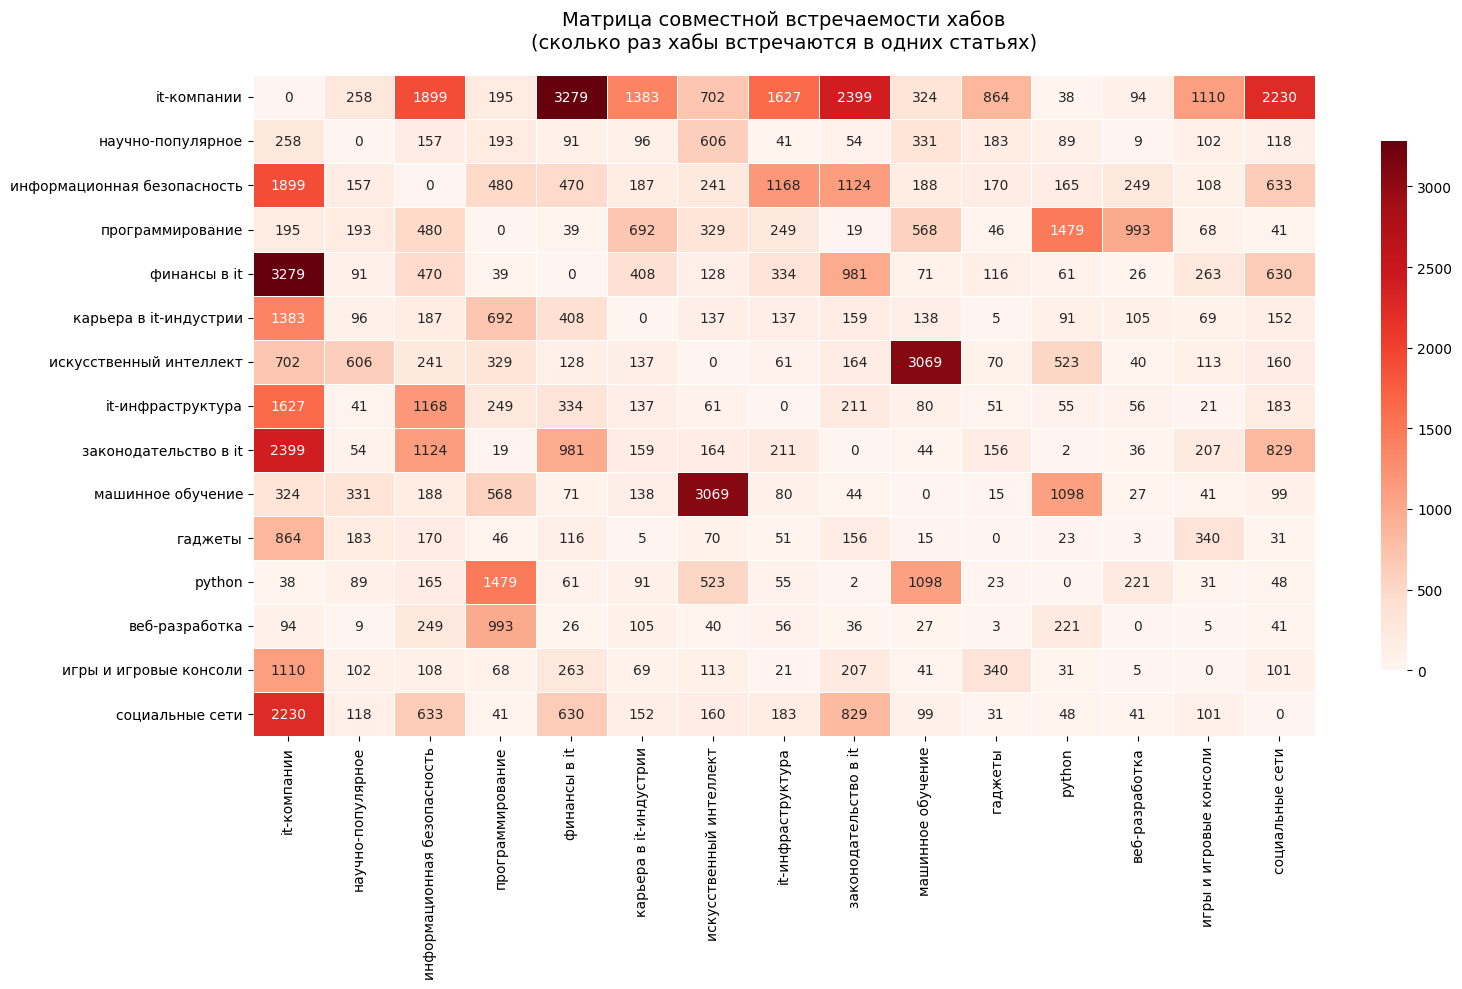

In [ ]:
top_hubs_list = [hub for hub, _ in hub_counts.most_common(15)]

cooccurrence_matrix = pd.DataFrame(0, index=top_hubs_list, columns=top_hubs_list)

for idx, row in data.iterrows():
    hubs_in_article = row['hubs']
    for i, hub1 in enumerate(hubs_in_article):
        for j, hub2 in enumerate(hubs_in_article):
            if i != j and hub1 in top_hubs_list and hub2 in top_hubs_list:
                cooccurrence_matrix.loc[hub1, hub2] += 1

np.fill_diagonal(cooccurrence_matrix.values, 0)

plt.figure(figsize=FIG_SIZE_LARGE)
sns.heatmap(cooccurrence_matrix,
            annot=True,
            fmt='d',
            cmap='Reds',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Матрица совместной встречаемости хабов\n(сколько раз хабы встречаются в одних статьях)',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [ ]:
hub_pairs = Counter()
for hubs in data['hubs']:
    if len(hubs) >= 2:
        for hub1, hub2 in combinations(sorted(hubs), 2):
            hub_pairs[(hub1, hub2)] += 1

for (hub1, hub2), count in hub_pairs.most_common(20):
    print(f"  {hub1:<25} + {hub2:<25} : {count:>3} статей")

  it-компании               + финансы в it              : 3279 статей
  искусственный интеллект   + машинное обучение         : 3069 статей
  космонавтика              + научно-популярное         : 2751 статей
  it-компании               + законодательство в it     : 2399 статей
  карьера в it-индустрии    + управление персоналом     : 2231 статей
  it-компании               + социальные сети           : 2230 статей
  астрономия                + научно-популярное         : 2206 статей
  научно-популярное         + физика                    : 2054 статей
  javascript                + веб-разработка            : 1906 статей
  it-компании               + информационная безопасность : 1899 статей
  будущее здесь             + научно-популярное         : 1630 статей
  it-инфраструктура         + it-компании               : 1627 статей
  здоровье                  + научно-популярное         : 1621 статей
  python                    + программирование          : 1479 статей
  android         


 топ 10 авторов:
username
denis-19         7793
maybe_elf        5918
AnnieBronson     3556
SLY_G            3290
Travis_Macrif    2918
ancotir          2471
marks            2417
alizar           2279
daniilshat       2235
IgnatChuker      1981
Name: count, dtype: int64


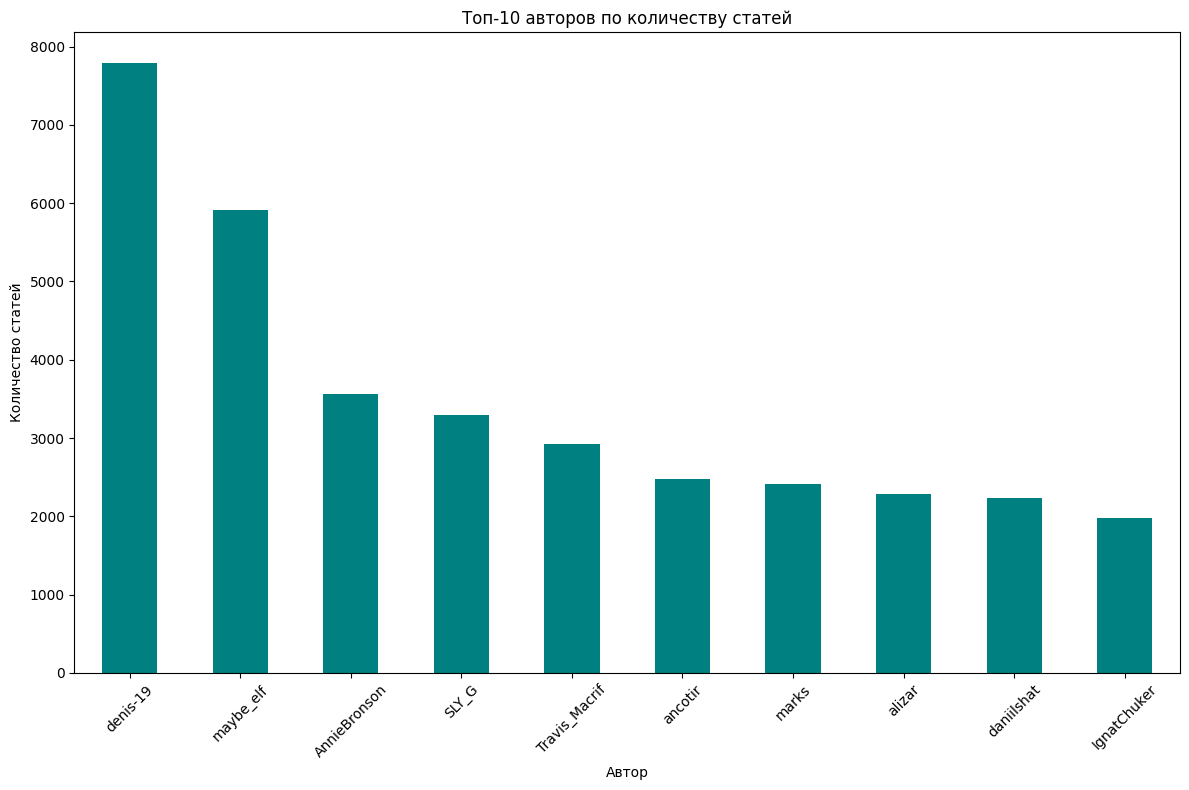

In [ ]:
top_authors = data['username'].value_counts().head(10)
print("\n топ 10 авторов:")
print(top_authors)

plt.figure(figsize=FIG_SIZE_MEDIUM)
top_authors.plot(kind='bar', color='teal')
plt.title('Топ-10 авторов по количеству статей')
plt.xlabel('Автор')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


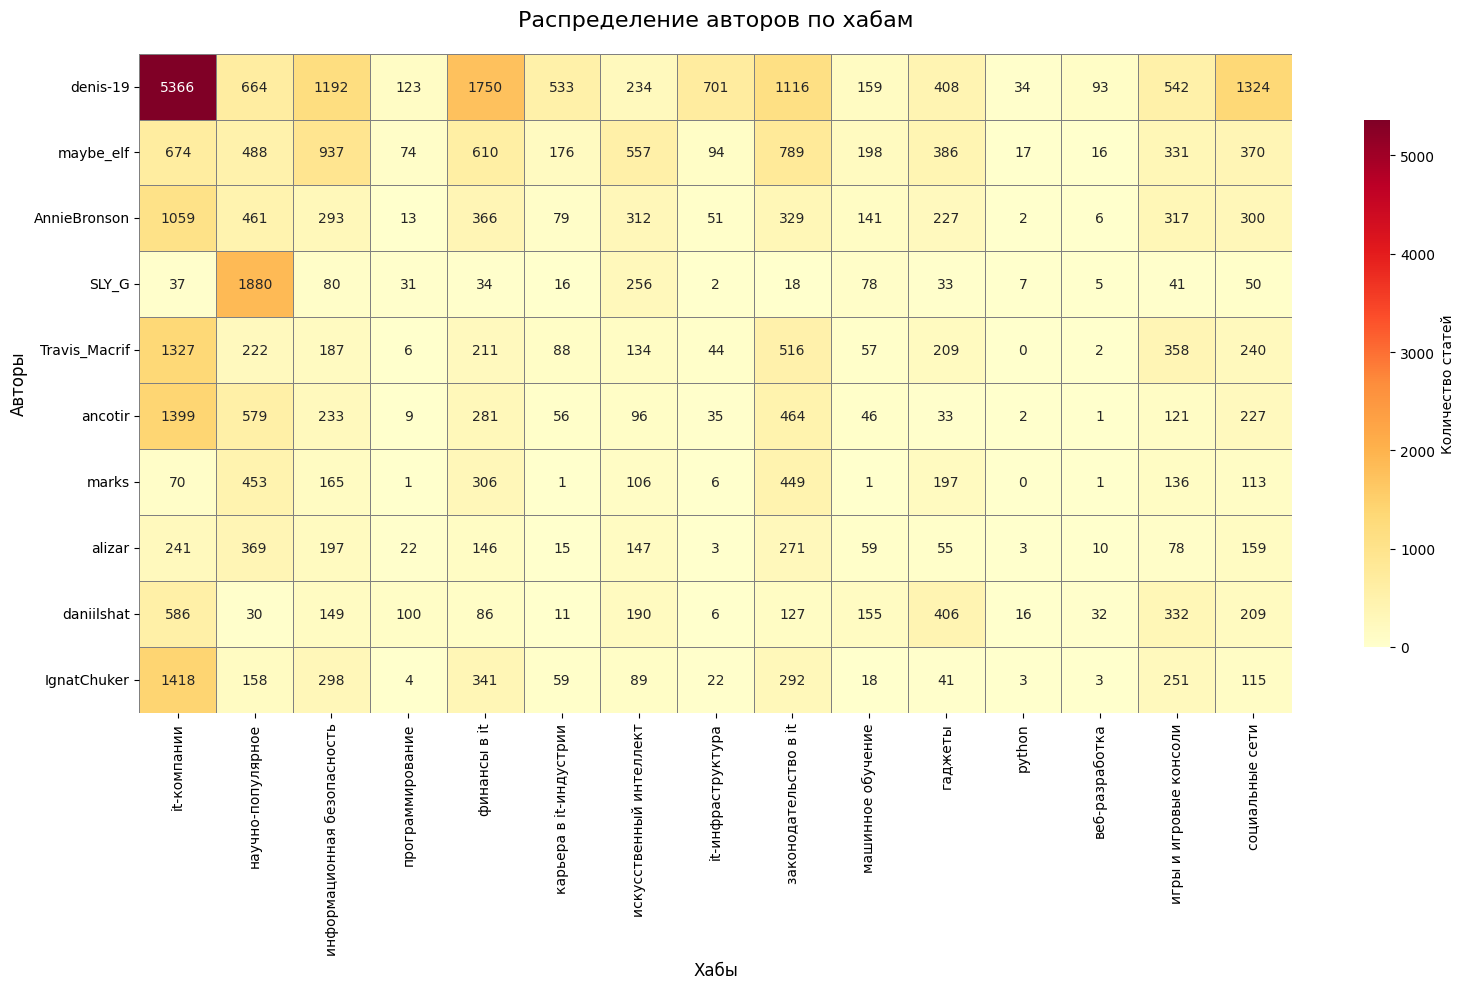

In [ ]:
user_hub_freq = {}
for _, row in data.iterrows():
    user = row['username']
    hubs = row['hubs']
    if user not in user_hub_freq:
        user_hub_freq[user] = Counter()
    user_hub_freq[user].update(hubs)

top_users = data['username'].value_counts().head(10).index

# Создаем матрицу автор-хаб
author_hub_matrix = pd.DataFrame(0, index=top_users, columns=top_hubs_list)

for idx, row in data.iterrows():
    author = row['username']
    if author in top_users:
        hubs_list = row['hubs']
        for hub in hubs_list:
            if hub in top_hubs_list:
                author_hub_matrix.loc[author, hub] += 1

plt.figure(figsize=FIG_SIZE_LARGE)
sns.heatmap(author_hub_matrix,
            annot=True,
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={'shrink': 0.8, 'label': 'Количество статей'})

plt.title('Распределение авторов по хабам', fontsize=16, pad=20)
plt.xlabel('Хабы', fontsize=12)
plt.ylabel('Авторы', fontsize=12)
plt.tight_layout()
plt.show()


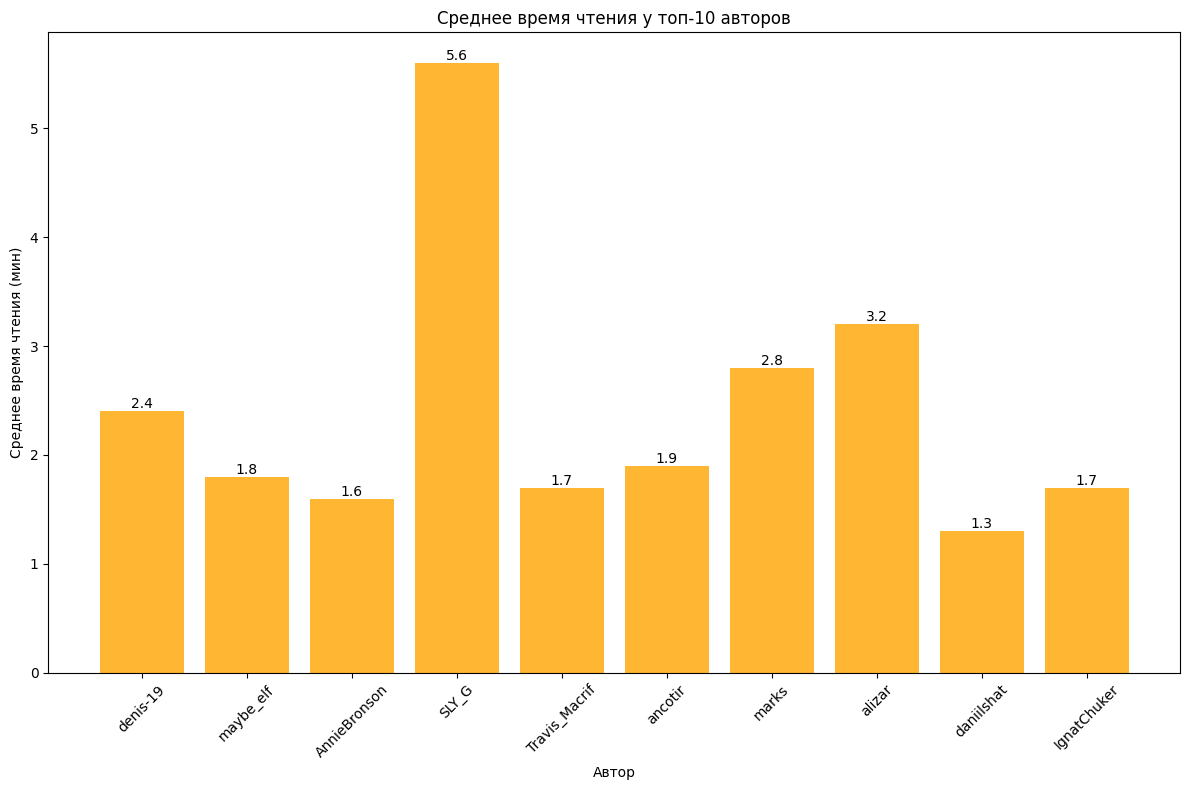

In [ ]:
author_article_count = data['username'].value_counts()

user_stats = data.groupby('username').agg({
    'reading_time': 'mean',
    'text_len': 'mean'
}).round(1)

user_stats['article_count'] = author_article_count

user_stats_top = user_stats.nlargest(10, 'article_count')

plt.figure(figsize=FIG_SIZE_MEDIUM)
bars = plt.bar(range(len(user_stats_top)), user_stats_top['reading_time'], color='orange', alpha=0.8)
plt.xlabel('Автор')
plt.ylabel('Среднее время чтения (мин)')
plt.title('Среднее время чтения у топ-10 авторов')
plt.xticks(range(len(user_stats_top)), user_stats_top.index, rotation=45)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

  python: 3907
  javascript: 2993
  apple: 2843
  искусственный интеллект: 2820
  разработка: 2746
  программирование: 2605
  microsoft: 2601
  информационная безопасность: 2350
  google: 2344
  машинное обучение: 2306
  java: 2297
  android: 2203
  linux: 2169
  игры: 2068
  devops: 1786


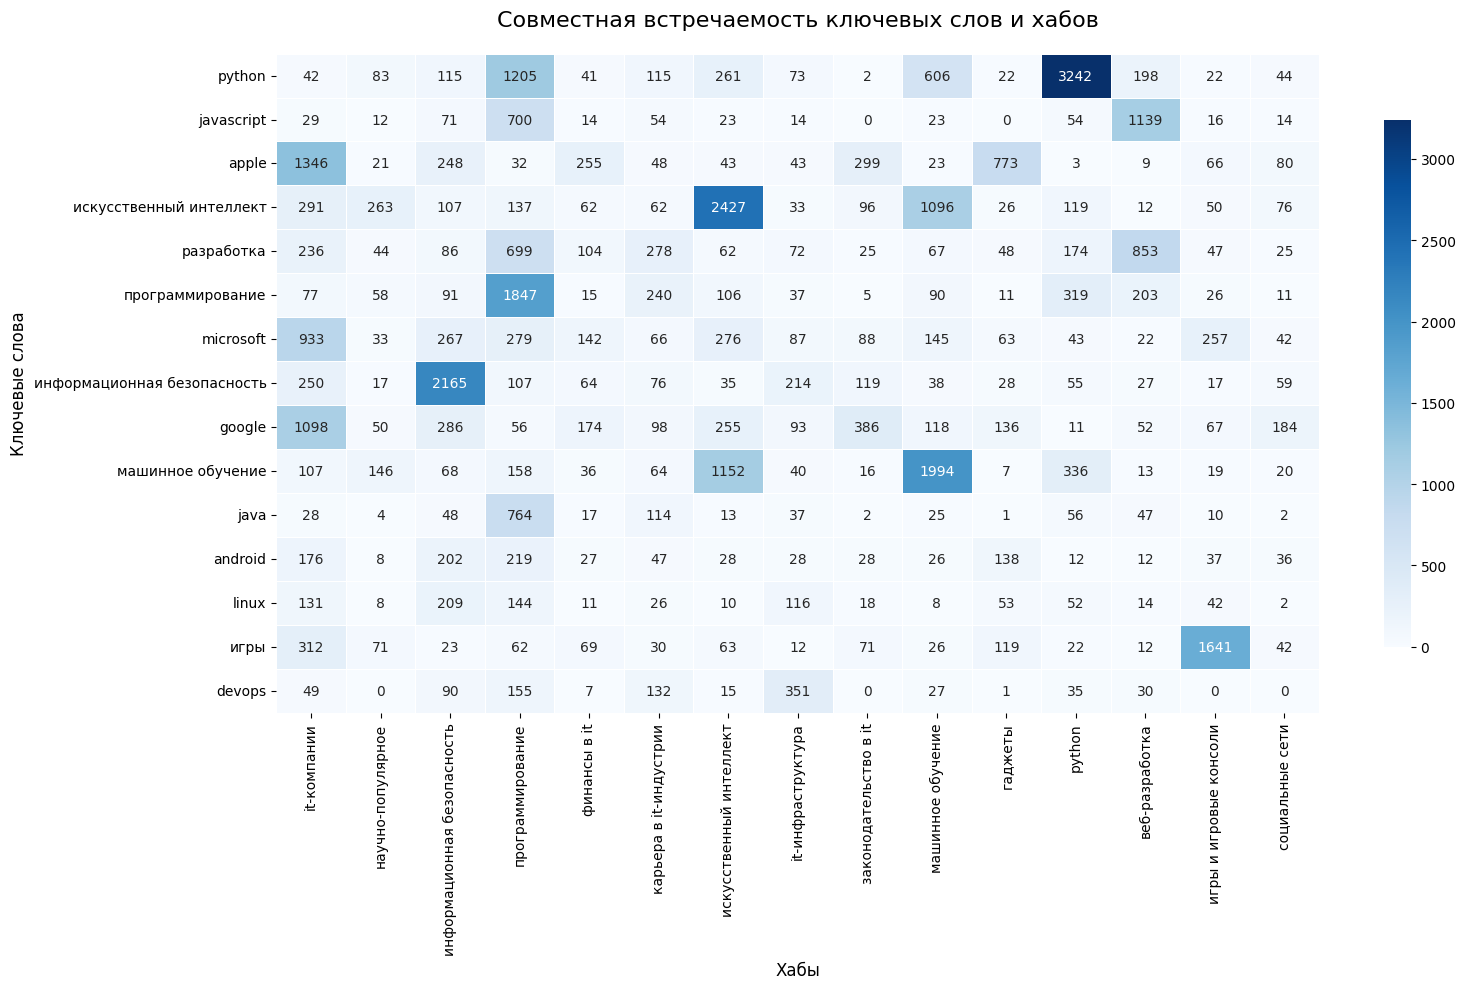

In [ ]:
all_keywords = []
for keywords in data['keywords']:
    all_keywords.extend(keywords)

keyword_counts = Counter(all_keywords)

for keyword, count in keyword_counts.most_common(15):
    print(f"  {keyword}: {count}")

top_keywords_list = [kw for kw, _ in keyword_counts.most_common(15)]
top_hubs_list = [hub for hub, _ in hub_counts.most_common(15)]

co_matrix_kw_hub = pd.DataFrame(0, index=top_keywords_list, columns=top_hubs_list)

for idx, row in data.iterrows():
    keywords_set = set(row['keywords'])
    hubs_set = set(row['hubs'])
    for keyword in keywords_set:
        for hub in hubs_set:
            if keyword in top_keywords_list and hub in top_hubs_list:
                co_matrix_kw_hub.loc[keyword, hub] += 1


plt.figure(figsize=FIG_SIZE_LARGE)
sns.heatmap(co_matrix_kw_hub,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5)
plt.title('Совместная встречаемость ключевых слов и хабов', fontsize=16, pad=20)
plt.xlabel('Хабы', fontsize=12)
plt.ylabel('Ключевые слова', fontsize=12)
plt.tight_layout()
plt.show()

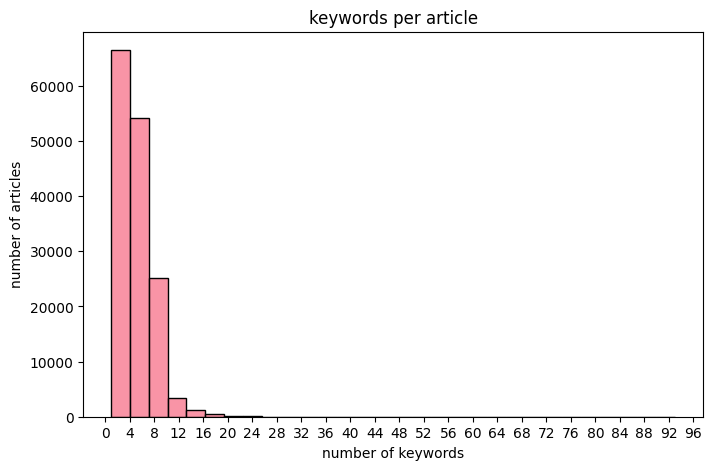

In [ ]:
data['num_keywords'] = data['keywords'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(data['num_keywords'], bins=30, kde=False)
plt.title("keywords per article")
plt.xlabel("number of keywords")
plt.ylabel("number of articles")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=30))

plt.show()